In [7]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_customer_data_custom_ratios.csv.zip to ecommerce_customer_data_custom_ratios.csv (1).zip


In [8]:
import pandas as pd
# Load the dataset
df = pd. read_csv("ecommerce_customer_data_custom_ratios.csv.zip")
# Show first 5 rows
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [9]:
# Shape and column info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.info()
# Check basic statistics
df.describe()

Shape: (250000, 13)

Columns:
 Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 no

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [10]:
# Drop missing values in Returns
df = df.dropna(subset=['Returns'])
# Drop duplicates if any
df = df.drop_duplicates()

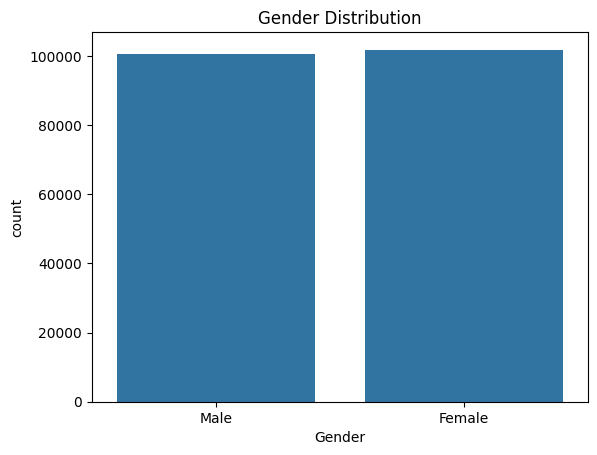

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

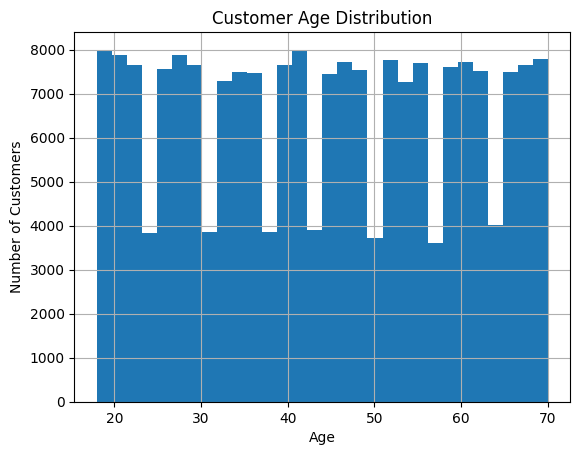

In [14]:
df['Age'].hist(bins=30)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt. show()

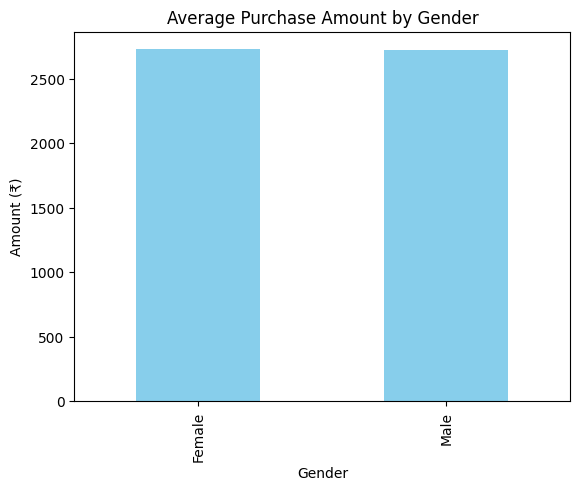

In [15]:
df.groupby('Gender') ['Total Purchase Amount'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Purchase Amount by Gender")
plt.ylabel("Amount (₹)")
plt.show()

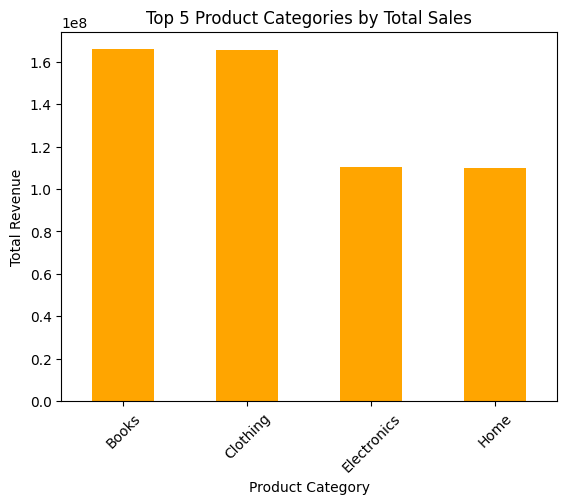

In [16]:
top_categories = df.groupby('Product Category') ['Total Purchase Amount'].sum().sort_values(ascending=False).head(5)
top_categories.plot(kind='bar', color='orange')
plt.title("Top 5 Product Categories by Total Sales")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

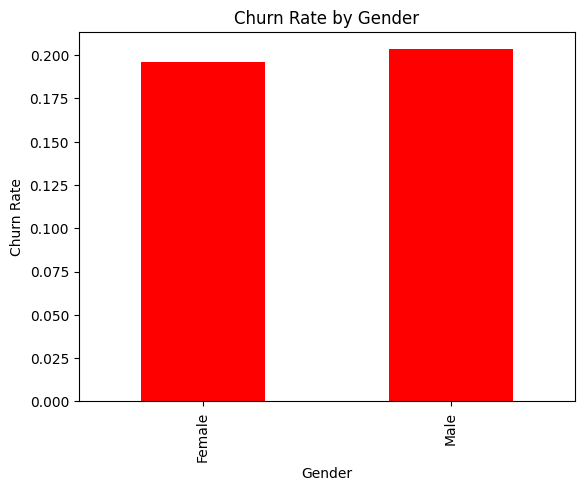

In [17]:
churn_by_gender = df.groupby('Gender') ['Churn'].mean()
churn_by_gender.plot(kind='bar', color='red')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.show()

In [18]:
# Total number of customers by gender
df['Gender'].value_counts()

,count
Gender,
Female,101798
Male,100606


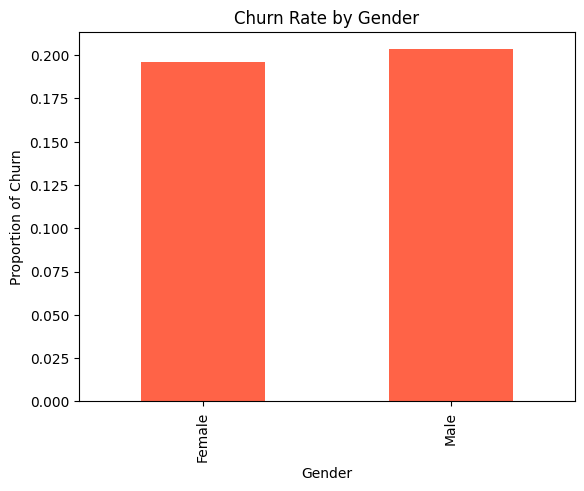

In [19]:
# Churn rate by gender
df.groupby('Gender') ['Churn'].mean().plot(kind='bar', color='tomato')
plt.title("Churn Rate by Gender")
plt.ylabel("Proportion of Churn")
plt.show()

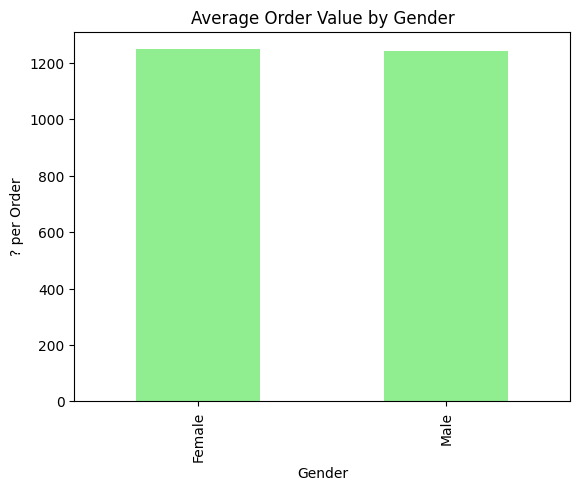

In [20]:
df['AOV'] = df['Total Purchase Amount'] / df['Quantity']
df.groupby('Gender') ['AOV'].mean().plot(kind='bar', color='lightgreen')
plt.title("Average Order Value by Gender")
plt.ylabel("? per Order")
plt. show()

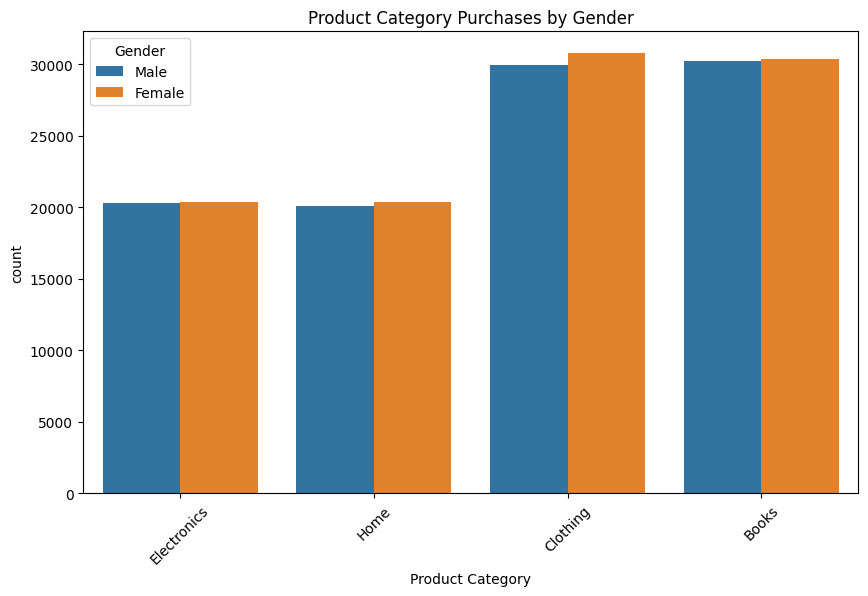

In [21]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product Category', hue='Gender')
plt.title("Product Category Purchases by Gender")
plt.xticks(rotation=45)
plt.show()

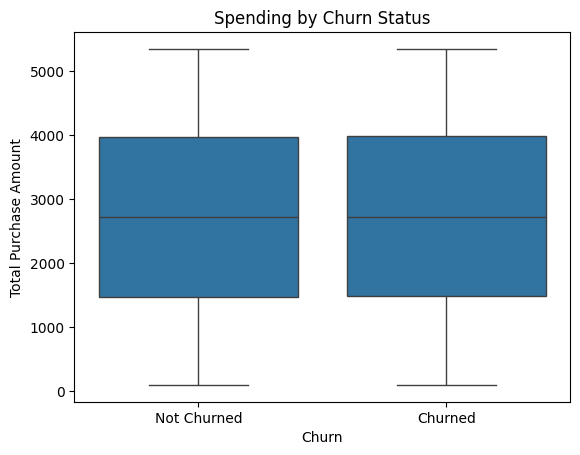

In [22]:
sns.boxplot(x='Churn', y='Total Purchase Amount', data=df)
plt.title("Spending by Churn Status")
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.show()